<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Lecture_9__Standardization___Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standardization & Normalization

<img width =600 src= https://www.computerhope.com/jargon/s/scale.jpg />

In practice, we often encounter different types of variables in the same dataset. A significant issue is that the range of the variables may differ a lot. Using the original scale may put more weights on the variables with a large range. In order to deal with this problem, we need to apply the technique of features rescaling to independent variables or features of data in the step of data pre-processing.

The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms

Example

<img width = 600 src = https://miro.medium.com/max/1400/1*5bWztvivp2xM-zQ7E6yJsA.png />

<img width = 600 src = https://miro.medium.com/max/1400/1*ufBTotZtwoec8Xx-5KYgag.png />

# Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively. The equation is shown below:

<img width =600 src = https://miro.medium.com/max/1400/1*xIilonr1kVdoQRRvcpc1ng.png />

<img width = 800 src= https://miro.medium.com/max/744/1*HW7-kYjj6RKwrO-5WTLkDA.png />

In [ ]:
from PIL import Image
image = Image.open('img.png')
img = np.asarray(image)

In [ ]:
img

array([[  0,   0,   0, ...,   3,   0,   0],
       [  0,   0,   0, ...,  33,  13,   0],
       [  4,   1,   0, ...,  96,  65,   6],
       ...,
       [124, 133, 139, ...,  33,  13,   8],
       [128, 138, 145, ...,  35,  28,  28],
       [135, 137, 136, ...,  35,  28,  34]], dtype=uint8)

In [ ]:
img.min(), img.max()

(0, 255)

In [ ]:
norm_img = img / 255.0
norm_img.min(), norm_img.max()

(0.0, 1.0)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_age = StandardScaler()
a = scale_age.fit_transform(df[["age"]])

In [ ]:
a[:5]

array([[ 0.9521966 ],
       [-1.91531289],
       [-1.47415758],
       [ 0.18017482],
       [ 0.29046364]])

In [ ]:
pd.DataFrame(a).std()

0    1.001654
dtype: float64

In [ ]:
pd.DataFrame(a).mean()

0    4.690051e-17
dtype: float64

In [ ]:
df["age"].mean()

54.366336633663366

In [ ]:
df["age"].std()

9.082100989837857

In [ ]:
(63 - df["age"].mean())/ df["age"].std()

0.9506240214678313

In [ ]:
pd.Series(data = a).describe()

ValueError: ignored

Dataset_link - https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset?select=heart+disease+classification+dataset.csv

In [ ]:
df = pd.read_csv("/content/heart disease classification dataset.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
# Drop "Unnamed: 0" column from df
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# drop missing rows
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [ ]:
X = df.drop(columns= ["target"])

In [ ]:
y = df["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target']),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((212, 13), (91, 13))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(yes    118
 no      94
 Name: target, dtype: int64,
 yes    47
 no     44
 Name: target, dtype: int64)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
y_train

137    yes
106    yes
284     no
44     yes
139    yes
      ... 
251     no
192     no
117    yes
47     yes
172     no
Name: target, Length: 212, dtype: object

### label encode y_train & y_test

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
y_train = pd.Series(label_encoder.fit_transform(y_train))
y_train

0      1
1      1
2      0
3      1
4      1
      ..
207    0
208    0
209    1
210    1
211    0
Length: 212, dtype: int64

In [ ]:
y_test = pd.Series(label_encoder.transform(y_test))
y_test

0     0
1     1
2     0
3     0
4     1
     ..
86    0
87    0
88    1
89    0
90    0
Length: 91, dtype: int64

In [ ]:
y_train[:5], y_test[:5]

(0    1
 1    1
 2    0
 3    1
 4    1
 dtype: int64, 0    0
 1    0
 2    0
 3    0
 4    1
 dtype: int64)

In [ ]:
X_train["sex"][9:12], X_test["sex"][9:12]

(289    female
 271      male
 35     female
 Name: sex, dtype: object, 47       male
 140    female
 17     female
 Name: sex, dtype: object)

In [ ]:
label_encoder_gender = LabelEncoder()

X_train["sex"] = label_encoder_gender.fit_transform(X_train["sex"])
X_test["sex"] = label_encoder_gender.transform(X_test["sex"])
X_train["sex"][9:12], X_test["sex"][9:12]

(252    0
 54     0
 234    1
 Name: sex, dtype: int64,
 217    1
 111    1
 135    0
 Name: sex, dtype: int64)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128.0,208.0,1,0,140.0,0,0.0,2,0,2
106,69,1,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2
284,61,1,0,140.0,207.0,0,0,138.0,1,1.9,2,1,3
44,39,1,2,140.0,321.0,0,0,182.0,0,0.0,2,0,2
139,64,1,0,128.0,263.0,0,1,105.0,1,0.2,1,1,3


# StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [ ]:
# st_scaler.fit_transform(X_train)
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled.head(), X_test_scaled.head()

(        age       sex        cp  trestbps      chol       fbs   restecg  \
 0  0.835114  0.739895  0.031511 -0.209519 -0.718763  2.288077 -1.024026   
 1  1.616520  0.739895  1.940202  1.712656 -0.250130  2.288077 -1.024026   
 2  0.723485  0.739895 -0.922834  0.511296 -0.736788 -0.437048 -1.024026   
 3 -1.732361  0.739895  0.985857  0.511296  1.317988 -0.437048 -1.024026   
 4  1.058373  0.739895 -0.922834 -0.209519  0.272576 -0.437048  0.847469   
 
     thalach     exang   oldpeak     slope        ca      thal  
 0 -0.446144 -0.724693 -0.907178  0.955317 -0.692649 -0.429218  
 1 -0.848825 -0.724693 -0.823777 -0.677967  0.292865 -0.429218  
 2 -0.535629  1.379895  0.677433  0.955317  0.292865  1.139647  
 3  1.433031 -0.724693 -0.907178  0.955317 -0.692649 -0.429218  
 4 -2.012124  1.379895 -0.740377 -0.677967  0.292865  1.139647  ,
         age       sex        cp  trestbps      chol       fbs   restecg  \
 0  1.728149  0.739895 -0.922834  0.811636 -1.331591 -0.437048  0.847469   

In [ ]:
# fit the scaler to the train set
st_scaler.fit(X_train)

# transform train and test sets
X_train_scaled = st_scaler.transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.527119,0.681385,-0.955368,0.247227,-0.201940,-0.430083,0.877358,0.463201,-0.666080,-0.397415,-0.743387,-0.711394,1.121175
1,-1.737599,0.681385,0.993393,0.427374,-1.379029,-0.430083,0.877358,1.009973,-0.666080,-0.845052,0.913074,3.151806,-0.568832
2,1.282025,0.681385,0.019012,1.748457,0.037468,-0.430083,0.877358,-1.404938,1.501322,-0.845052,-0.743387,2.186006,-2.258839
3,1.066338,0.681385,-0.955368,-0.173117,0.376630,-0.430083,0.877358,-2.088403,1.501322,-0.665997,-0.743387,0.254406,1.121175
4,-1.845443,-1.467599,0.993393,-0.653511,-0.581002,-0.430083,0.877358,0.873280,-0.666080,-0.845052,0.913074,-0.711394,-0.568832


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
20,59,1,0,135.0,234.0,0,1,161.0,0,0.5,1,0,3
163,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2
247,66,1,1,160.0,246.0,0,1,120.0,1,0.0,1,3,1
139,64,1,0,128.0,263.0,0,1,105.0,1,0.2,1,1,3
115,37,0,2,120.0,215.0,0,1,170.0,0,0.0,2,0,2


In [ ]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,54.112195,0.682927,0.980488,130.882927,244.121951,0.156098,0.546341,150.834146,0.307317,0.943902,1.448780,0.736585,2.336585
std,9.295376,0.466475,1.028806,16.693780,50.246352,0.363836,0.518339,22.000709,0.462511,1.119710,0.605175,1.037946,0.593162
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,154.000000,0.000000,0.600000,2.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
X_train_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,2.772850e-16,-1.213122e-16,-1.733031e-17,4.505881e-16,-6.932124e-17,-2.328760e-17,0.000000,-3.899320e-16,-3.791005e-17,7.257068e-17,8.610998e-17,-1.733031e-17,2.166289e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.708193e+00,-1.467599e+00,-9.553681e-01,-2.214790e+00,-2.356611e+00,-4.300827e-01,-1.056604,-3.637591e+00,-6.660796e-01,-8.450523e-01,-2.399848e+00,-7.113941e-01,-3.948845e+00
25%,-8.748493e-01,-1.467599e+00,-9.553681e-01,-6.535109e-01,-7.206568e-01,-4.300827e-01,-1.056604,-4.936508e-01,-6.660796e-01,-8.450523e-01,-7.433873e-01,-7.113941e-01,-5.688316e-01
50%,9.574418e-02,6.813851e-01,1.901230e-02,-5.301904e-02,-6.228499e-02,-4.300827e-01,0.877358,1.442501e-01,-6.660796e-01,-3.078873e-01,9.130736e-01,-7.113941e-01,-5.688316e-01
75%,7.428065e-01,6.813851e-01,9.933927e-01,5.474729e-01,5.362349e-01,-4.300827e-01,0.877358,7.821510e-01,1.501322e+00,5.873878e-01,9.130736e-01,2.544058e-01,1.121175e+00
max,2.468306e+00,6.813851e-01,1.967773e+00,4.150424e+00,6.381779e+00,2.325134e+00,2.811321,2.331339e+00,1.501322e+00,4.705653e+00,9.130736e-01,3.151806e+00,1.121175e+00


In [ ]:
round(X_train_scaled.describe(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.71,-1.47,-0.96,-2.21,-2.36,-0.43,-1.06,-3.64,-0.67,-0.85,-2.40,-0.71,-3.95
25%,-0.87,-1.47,-0.96,-0.65,-0.72,-0.43,-1.06,-0.49,-0.67,-0.85,-0.74,-0.71,-0.57
50%,0.10,0.68,0.02,-0.05,-0.06,-0.43,0.88,0.14,-0.67,-0.31,0.91,-0.71,-0.57
75%,0.74,0.68,0.99,0.55,0.54,-0.43,0.88,0.78,1.50,0.59,0.91,0.25,1.12
max,2.47,0.68,1.97,4.15,6.38,2.33,2.81,2.33,1.50,4.71,0.91,3.15,1.12


In [ ]:
train_plot = X_train.copy().reset_index(drop = True)
train_plot["target"] = y_train
test_plot = X_test.copy().reset_index(drop = True)
test_plot["target"] = y_test
train_plot.head(2), test_plot.head(2)

(   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0   59    1   0     135.0  234.0    0        1    161.0      0      0.5   
 1   38    1   2     138.0  175.0    0        1    173.0      0      0.0   
 
    slope  ca  thal  target  
 0      1   0     3       1  
 1      2   4     2       1  ,
    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0   64    1   0     120.0  246.0    0        0     96.0      1      2.2   
 1   67    1   2     152.0  212.0    0        0    150.0      0      0.8   
 
    slope  ca  thal  target  
 0      0   1     2       0  
 1      1   0     3       0  )

In [ ]:
train_scale_plot = X_train_scaled.copy()
train_scale_plot["target"] = y_train
test_scale_plot = X_test_scaled.copy()
test_scale_plot["target"] = y_test
train_scale_plot.head(2), test_scale_plot.head(2)

(        age       sex        cp  trestbps      chol       fbs   restecg  \
 0  0.527119  0.681385 -0.955368  0.247227 -0.201940 -0.430083  0.877358   
 1 -1.737599  0.681385  0.993393  0.427374 -1.379029 -0.430083  0.877358   
 
     thalach    exang   oldpeak     slope        ca      thal  target  
 0  0.463201 -0.66608 -0.397415 -0.743387 -0.711394  1.121175       1  
 1  1.009973 -0.66608 -0.845052  0.913074  3.151806 -0.568832       1  ,
         age       sex        cp  trestbps      chol       fbs   restecg  \
 0  1.066338  0.681385 -0.955368 -0.653511  0.037468 -0.430083 -1.056604   
 1  1.389869  0.681385  0.993393  1.268063 -0.640854 -0.430083 -1.056604   
 
     thalach     exang   oldpeak     slope        ca      thal  target  
 0 -2.498482  1.501322  1.124553 -2.399848  0.254406 -0.568832       0  
 1 -0.038007 -0.666080 -0.128832 -0.743387 -0.711394  1.121175       0  )

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
20,59,1,0,135.0,234.0,0,1,161.0,0,0.5,1,0,3
163,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2
247,66,1,1,160.0,246.0,0,1,120.0,1,0.0,1,3,1
139,64,1,0,128.0,263.0,0,1,105.0,1,0.2,1,1,3
115,37,0,2,120.0,215.0,0,1,170.0,0,0.0,2,0,2


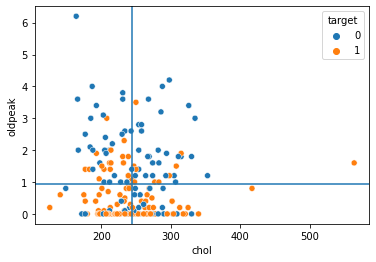

In [ ]:
sns.scatterplot(data = train_plot, x="chol", y="oldpeak", hue="target")
plt.axhline(train_plot["oldpeak"].mean())
plt.axvline(train_plot["chol"].mean())
plt.show()

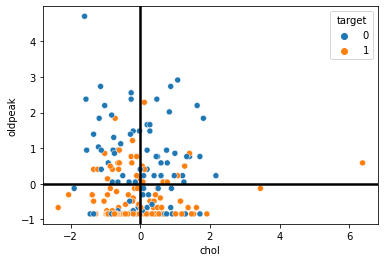

In [ ]:
sns.scatterplot(data = train_scale_plot, x="chol", y="oldpeak", hue="target")
plt.axhline(train_scale_plot["oldpeak"].mean(), c='k', lw=2.5)
plt.axvline(train_scale_plot["chol"].mean(), c='k', lw=2.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


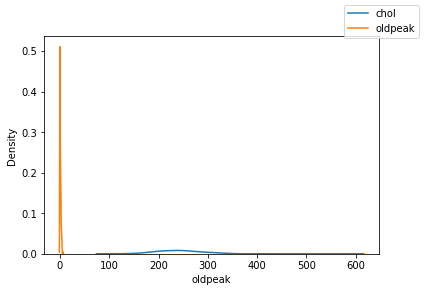

In [ ]:
fig = plt.figure(figsize=(6,4))
sns.distplot(train_plot["chol"], hist = False)
sns.distplot(train_plot["oldpeak"], hist = False)

fig.legend(labels=["chol","oldpeak"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


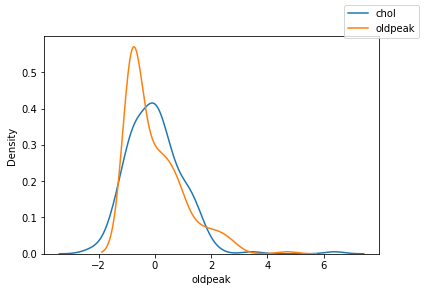

In [ ]:
fig = plt.figure(figsize=(6,4))
sns.distplot(train_scale_plot["chol"], hist = False)
sns.distplot(train_scale_plot["oldpeak"], hist = False)

fig.legend(labels=["chol","oldpeak"])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# function for comparing different approaches
def score_dataset(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

In [ ]:
score_dataset(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8068181818181818

In [ ]:
score_dataset(X_train_scaled, X_test_scaled, y_train, y_test)

0.8181818181818182

# Max-Min Normalization

This technique is to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1. The general equation is shown below:

<img width = 600 src = https://miro.medium.com/max/1400/1*GwcC80mDUyscDAWtwZSBdA.png />

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# fit the scaler to the train set
min_max_scaler.fit(X_train)

# transform train and test sets
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.625000,1.0,0.000000,0.386792,0.246575,0.0,0.5,0.687023,0.0,0.080645,0.5,0.00,1.000000
1,0.187500,1.0,0.666667,0.415094,0.111872,0.0,0.5,0.778626,0.0,0.000000,1.0,1.00,0.666667
2,0.770833,1.0,0.333333,0.622642,0.273973,0.0,0.5,0.374046,1.0,0.000000,0.5,0.75,0.333333
3,0.729167,1.0,0.000000,0.320755,0.312785,0.0,0.5,0.259542,1.0,0.032258,0.5,0.25,1.000000
4,0.166667,0.0,0.666667,0.245283,0.203196,0.0,0.5,0.755725,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
X_train_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.523171,0.682927,0.326829,0.347952,0.269685,0.156098,0.273171,0.609421,0.307317,0.152242,0.724390,0.184146,0.778862
std,0.193654,0.466475,0.342935,0.157488,0.114718,0.363836,0.259169,0.167944,0.462511,0.180598,0.302587,0.259486,0.197721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354167,0.000000,0.000000,0.245283,0.187215,0.000000,0.000000,0.526718,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.262557,0.000000,0.500000,0.633588,0.000000,0.096774,1.000000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.331050,0.000000,0.500000,0.740458,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_scale_plot = X_train_scaled.copy()
train_scale_plot["target"] = y_train
test_scale_plot = X_test_scaled.copy()
test_scale_plot["target"] = y_test
train_scale_plot.head(2), test_scale_plot.head(2)

(      age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
 0  0.6250  1.0  0.000000  0.386792  0.246575  0.0      0.5  0.687023    0.0   
 1  0.1875  1.0  0.666667  0.415094  0.111872  0.0      0.5  0.778626    0.0   
 
     oldpeak  slope   ca      thal  target  
 0  0.080645    0.5  0.0  1.000000       1  
 1  0.000000    1.0  1.0  0.666667       1  ,
         age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
 0  0.729167  1.0  0.000000  0.245283  0.273973  0.0      0.0  0.190840    1.0   
 1  0.791667  1.0  0.666667  0.547170  0.196347  0.0      0.0  0.603053    0.0   
 
     oldpeak  slope    ca      thal  target  
 0  0.354839    0.0  0.25  0.666667       0  
 1  0.129032    0.5  0.00  1.000000       0  )

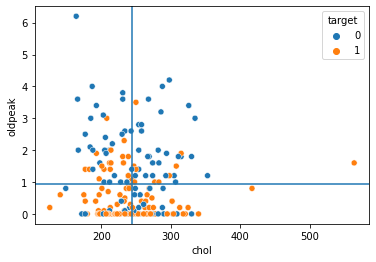

In [ ]:
sns.scatterplot(data = train_plot, x="chol", y="oldpeak", hue="target")
plt.axhline(train_plot["oldpeak"].mean())
plt.axvline(train_plot["chol"].mean())
plt.show()

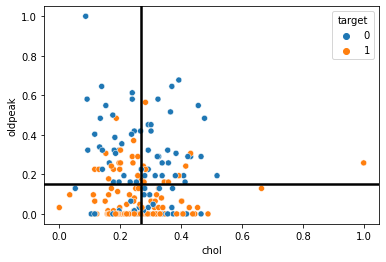

In [ ]:
sns.scatterplot(data = train_scale_plot, x="chol", y="oldpeak", hue="target")
plt.axhline(train_scale_plot["oldpeak"].mean(), c='k', lw=2.5)
plt.axvline(train_scale_plot["chol"].mean(), c='k', lw=2.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


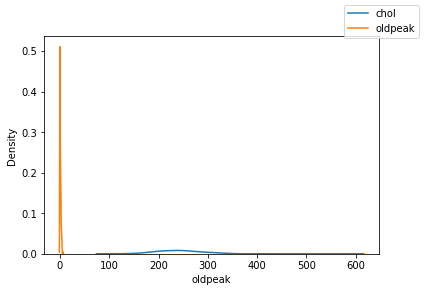

In [ ]:
fig = plt.figure(figsize=(6,4))
sns.distplot(train_plot["chol"], hist = False)
sns.distplot(train_plot["oldpeak"], hist = False)

fig.legend(labels=["chol","oldpeak"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


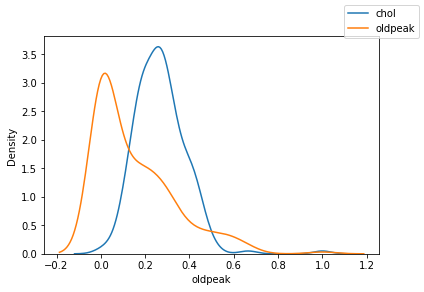

In [ ]:
fig = plt.figure(figsize=(6,4))
sns.distplot(train_scale_plot["chol"], hist = False)
sns.distplot(train_scale_plot["oldpeak"], hist = False)

fig.legend(labels=["chol","oldpeak"])

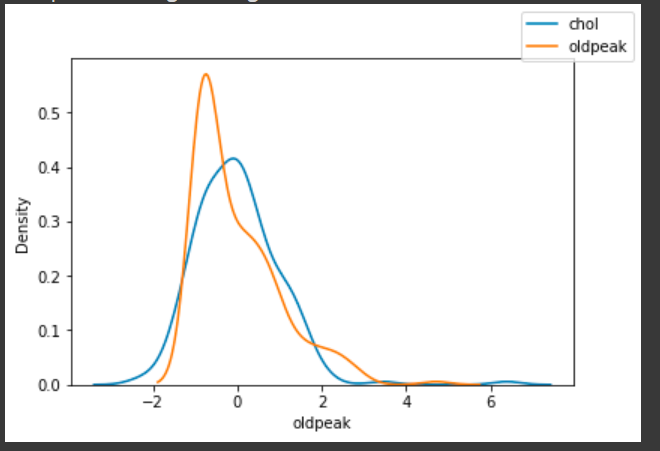

In [ ]:
score_dataset(X_train_scaled, X_test_scaled, y_train, y_test)

0.8068181818181818

## Max Absolute Scaling

Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable

<img width = 400 src = https://miro.medium.com/max/233/1*qa_W9JzNscAXpTtc44yhow.png />

## Robust Scaler

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

 If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.
 
<img width = 600 src = https://d2mk45aasx86xg.cloudfront.net/image7_11zon_fb087c1656.webp />

max absolute scalling - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

Robust scalling - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#:~:text=Scale%20features%20using%20statistics%20that,3rd%20quartile%20(75th%20quantile).

Below are some basic tips that you can use while trying to scale:
1. If you do not know which scaler to use, apply all and check the effect on the models.
2. If you do not understand the data, use standard scaler. It works most of the times.
3. If you know the max and min values of the feature, then use min max scaler. Like in CNN.
4. If most of the values in the feature column is 0 or sparce matrix, then use Max Absolute Scaling
5. If the data has outliers, use Robust Scaling.


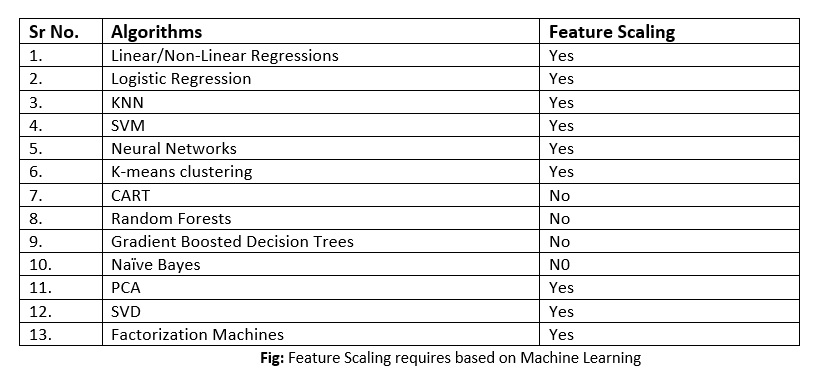